# Laboratorio - Transmisión digital de señales analógicas.

**Universidad Nacional de Colombia**

---

## Teoría de la Información y Sistemas de Comunicaciones

**Integrantes:**
- Gabriel Andres Anzola Tachak - *ganzola@unal.edu.co*
- Juan Manuel Perez Ordoñez - *juperezor@unal.edu.co*
- Sebastian Camilo Casas Rojas - *scasasr@unal.edu.co*

1. ***PCM uniforme.*** Desarrolle un programa que para una señal de mensaje $𝑚(𝑡)$ consistente en una sinusoide o suma de sinusoides, realice el proceso de modulación y demodulación PCM con cuantización uniforme:
    - a. Muestreo, aplicando el teorema del muestreo $(𝑓_𝑠≥2𝑓_𝑀)$.
    - b. Cuantización, utilizando cuantización uniforme.
    - c. Codificación.
    - d. Generación de formatos de señalización, graficando las formas de onda de pulsos correspondientes a cualquiera de los siguientes formatos de señalización:
        - Unipolar NRZ.
        - Bipolar NRZ.
        - Unipolar RZ.
        - Bipolar RZ.
        - AMI RZ.
        - Manchester.
    - e. Para recuperar la señal $𝑚(𝑡)$ en el extremo receptor (demodulador), utilice la ec. (5.2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the signal function
def m(t):
    return np.cos(2 * np.pi * t)  # + np.sin(2 * np.pi * 2 * t)

In [3]:
# Define the sample function
def sample(func, tmax, T0, num_samples):
    Ts = T0 / num_samples
    t = np.linspace(0, tmax, num_samples, endpoint=False)
    m_s = func(t)
    return t, m_s, Ts

In [4]:
# Quantization function
def cuantUniforme(signal, a, n):
    delta = 2 * a / (2**n)
    L = np.arange(-a + delta / 2, a, delta)
    m_sq = np.zeros_like(signal)
    for i, sample in enumerate(signal):
        m_sq[i] = min(L, key=lambda x: abs(x - sample))
    return m_sq, delta, L

In [5]:
# Encode function
def encode(mq, delta):
    Amax = np.abs(np.max(mq))
    size = len(mq)
    c = np.zeros(size, dtype=int)
    for i in range(size):
        level = int((mq[i] + Amax) / delta)
        binary_code = bin(level)[2:]  # Convert to binary and remove '0b' prefix
        c[i] = int(binary_code)
    return c

In [6]:
# Functions for different signal formats


def UNRZ(code, L):
    def transform_code(binary_code, L):
        # Transform binary code to levels
        levels = []
        for bit in binary_code:
            levels.append(L * int(bit))
        return levels

    bits = transform_code(code, L)

    t = np.arange(0, len(code), 0.01)
    values = []

    for el in t:
        temp = int(el)
        if (bits[temp]).any() == 0:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(-1)
        else:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(1)

    return values


def BNRZ(code, L):
    def transform_code(binary_code, L):
        # Transform binary code to levels
        levels = []
        for bit in binary_code:
            levels.append(L * int(bit))
        return levels

    bits = transform_code(code, L)

    t = np.arange(0, len(code), 0.01)
    values = []

    for el in t:
        temp = int(el)
        if (bits[temp]).any() == 0:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(-1)
        else:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(1)

    return values


def URZ(code, L):
    def transform_code(binary_code, L):
        # Transform binary code to levels
        levels = []
        for bit in binary_code:
            levels.append(L * int(bit))
        return levels

    bits = transform_code(code, L)

    t = np.arange(0, len(code), 0.01)
    values = []

    for el in t:
        temp = int(el)
        if (bits[temp]).any() == 0:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(0 if el - temp >= 0.5 else 1)
        else:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(1)

    return values


def BRZ(code, L):
    def transform_code(binary_code, L):
        # Transform binary code to levels
        levels = []
        for bit in binary_code:
            levels.append(L * int(bit))
        return levels

    bits = transform_code(code, L)

    t = np.arange(0, len(code), 0.01)
    values = []

    for el in t:
        temp = int(el)
        if (bits[temp]).any() == 0:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(-1)
        else:
            if el - temp >= 0.5:
                values.append(0)
            else:
                values.append(1)

    return values


def AMI(code, L):
    def transform_code(binary_code, L):
        # Transform binary code to levels
        levels = []
        for bit in binary_code:
            levels.append(L * int(bit))
        return levels

    bits = transform_code(code, L)

    t = np.arange(0, len(code), 0.01)
    values = []

    sign = 1
    last_code = 0

    for el in t:
        temp = int(el)
        if (bits[temp]).any() == 0:
            values.append(0)
        else:
            if el - temp >= 0.5:
                values.append(0)
            else:
                if last_code != int(el + 0.01):
                    sign = sign * -1
                    last_code = int(el)
                values.append(1 * sign)

    return values


def manchester(code, L):
    def transform_code(binary_code, L):
        # Transform binary code to levels
        levels = []
        for bit in binary_code:
            levels.append(L * int(bit))
        return levels

    bits = transform_code(code, L)

    t = np.arange(0, len(code), 0.01)
    values = []

    for el in t:
        temp = int(el)
        if (bits[temp]).any() == 0:
            if el - temp >= 0.5:
                values.append(1)
            else:
                values.append(-1)
        else:
            if el - temp >= 0.5:
                values.append(-1)
            else:
                values.append(1)

    return values

In [7]:
# Function to recreate the signal
def recreate(tmax, samples, t_values):
    return np.interp(
        t_values, np.linspace(0, tmax, len(samples), endpoint=False), samples
    )

Text(0.5, 1.0, 'Sampling in the time domain')

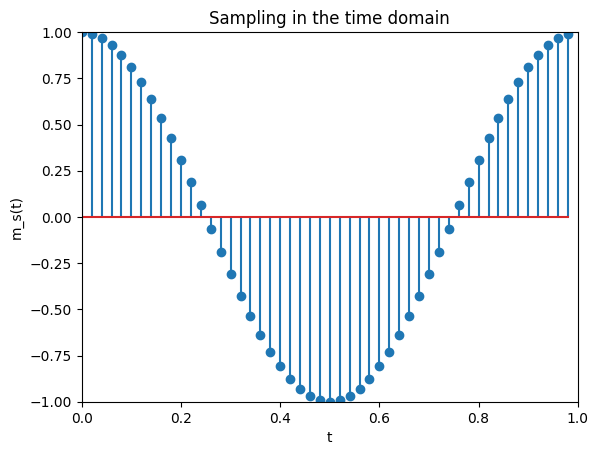

In [8]:

# Define the time interval
x_t = np.arange(0, 1, 0.02)

# Point 1a
T_0 = 1
tmax = 1

# Sampling
t, m_s, Ts = sample(m, tmax, T_0, 50)

# Plot the sampled signal in the time domain
n_plots = 2
plt.plot(n_plots)
plt.stem(t, m_s)
plt.xlabel("t")
plt.ylabel("m_s(t)")
plt.axis([0, tmax, -max(m_s), max(m_s)])
plt.title("Sampling in the time domain")


(0.0, 1.0)

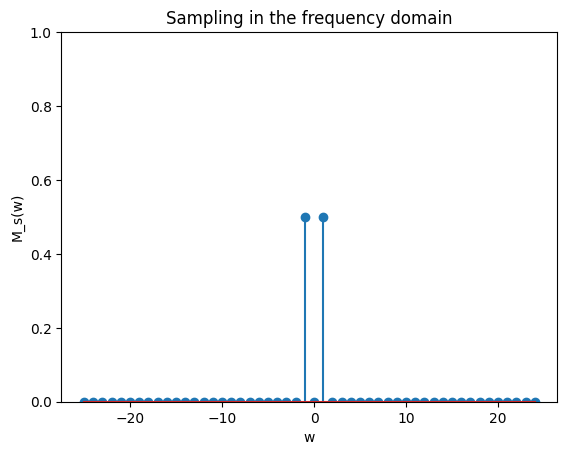

In [9]:

# Plot the sampled signal in the frequency domain
X = np.fft.fft(m_s) * Ts
f_s = 1 / Ts
f = np.arange(0, f_s)

plt.stem(f - (f_s / 2), np.fft.fftshift(np.abs(X)))
plt.xlabel("w")
plt.ylabel("M_s(w)")
plt.title("Sampling in the frequency domain")
plt.ylim(0, 1)


Text(0.5, 1.0, 'Quantization in the time domain')

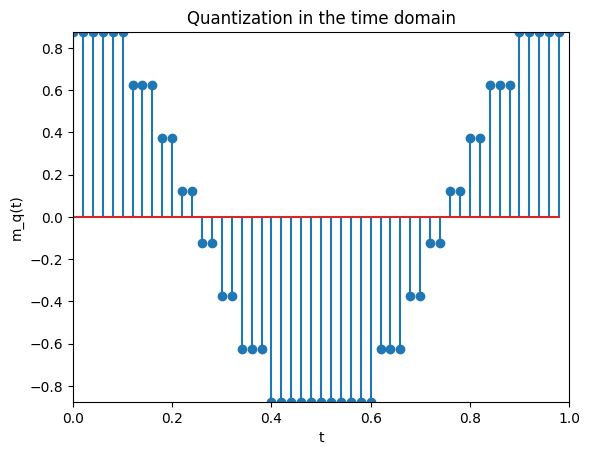

In [10]:
# Point 1b
a = max(m_s)
n = 3
m_sq, d, L = cuantUniforme(m_s, a, n)

# Plot the quantized sample in the time domain
plt.plot(n_plots)
plt.stem(t, m_sq)
plt.xlabel("t")
plt.ylabel("m_q(t)")
plt.axis([0, tmax, -max(m_sq), max(m_sq)])
plt.title("Quantization in the time domain")

(0.0, 1.0)

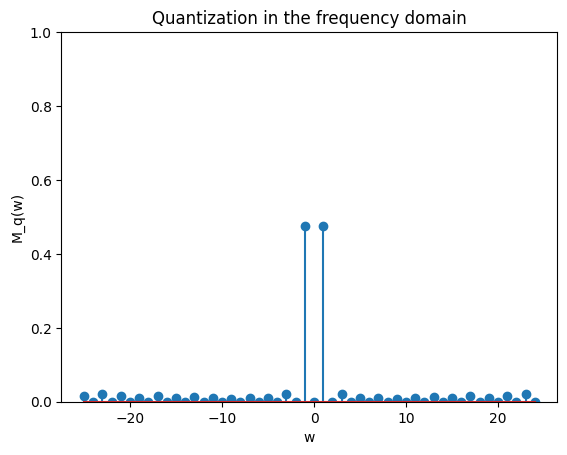

In [11]:
# Plot the quantized sample in the frequency domain
X_q = np.fft.fft(m_sq) * Ts
plt.plot(n_plots)
plt.stem(f - (f_s / 2), np.fft.fftshift(np.abs(X_q)))
plt.xlabel("w")
plt.ylabel("M_q(w)")
plt.title("Quantization in the frequency domain")
plt.ylim(0, 1)

Text(0, 0.5, 'Amplitude')

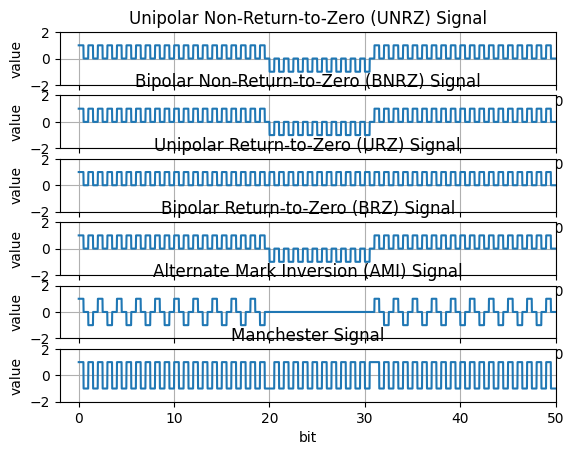

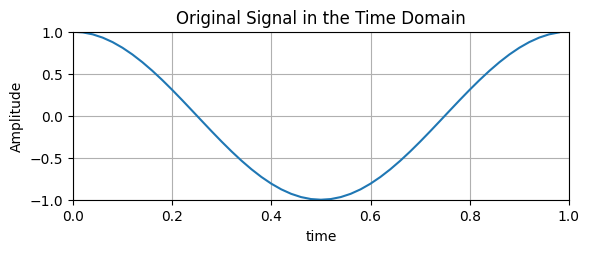

In [12]:
# Point 1c
c = encode(m_sq, d)

# Point 1d
d1 = UNRZ(c, L)
d2 = BNRZ(c, L)
d3 = URZ(c, L)
d4 = BRZ(c, L)
d5 = AMI(c, L)
d6 = manchester(c, L)

# Define time interval for the x-axis (time axis)
t = np.arange(0, len(c), 0.01)

# Plot each of the signal formats
plt.subplot(6, 1, 1)
plt.plot(t, d1)
plt.axis([-2, len(c), -2, 2])
plt.grid(True)
plt.title("Unipolar Non-Return-to-Zero (UNRZ) Signal")
plt.xlabel("bit")
plt.ylabel("value")

plt.subplot(6, 1, 2)
plt.plot(t, d2)
plt.axis([-2, len(c), -2, 2])
plt.grid(True)
plt.title("Bipolar Non-Return-to-Zero (BNRZ) Signal")
plt.xlabel("bit")
plt.ylabel("value")

plt.subplot(6, 1, 3)
plt.plot(t, d3)
plt.axis([-2, len(c), -2, 2])
plt.grid(True)
plt.title("Unipolar Return-to-Zero (URZ) Signal")
plt.xlabel("bit")
plt.ylabel("value")

plt.subplot(6, 1, 4)
plt.plot(t, d4)
plt.axis([-2, len(c), -2, 2])
plt.grid(True)
plt.title("Bipolar Return-to-Zero (BRZ) Signal")
plt.xlabel("bit")
plt.ylabel("value")

plt.subplot(6, 1, 5)
plt.plot(t, d5)
plt.axis([-2, len(c), -2, 2])
plt.grid(True)
plt.title("Alternate Mark Inversion (AMI) Signal")
plt.xlabel("bit")
plt.ylabel("value")

plt.subplot(6, 1, 6)
plt.plot(t, d6)
plt.axis([-2, len(c), -2, 2])
plt.grid(True)
plt.title("Manchester Signal")
plt.xlabel("bit")
plt.ylabel("value")

# Point 1e
# Plot the original signal in the time domain
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x_t, m(x_t))
plt.axis([0, 1, -1, 1])
plt.grid(True)
plt.title("Original Signal in the Time Domain")
plt.xlabel("time")
plt.ylabel("Amplitude")

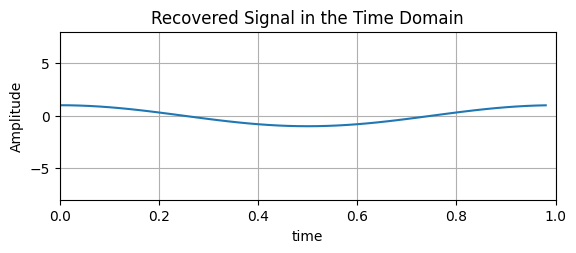

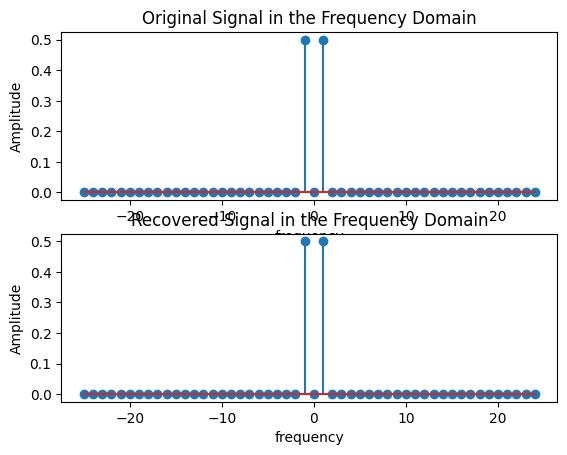

In [13]:
# Recover the signal
recoveredSignal = recreate(tmax, m_s, x_t)

# Plot the recovered signal in the time domain
plt.subplot(2, 1, 2)
plt.plot(x_t, recoveredSignal)
plt.axis([0, 1, -8, 8])
plt.grid(True)
plt.title("Recovered Signal in the Time Domain")
plt.xlabel("time")
plt.ylabel("Amplitude")

# Plot the original signal in the frequency domain
plt.figure()
X = np.fft.fft(m_s) * Ts
plt.subplot(2, 1, 1)
plt.stem(f - (f_s / 2), np.fft.fftshift(np.abs(X)))
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("Original Signal in the Frequency Domain")

# Plot the recovered signal in the frequency domain
X = np.fft.fft(recoveredSignal) * Ts
plt.subplot(2, 1, 2)
plt.stem(f - (f_s / 2), np.fft.fftshift(np.abs(X)))
plt.xlabel("frequency")
plt.ylabel("Amplitude")
plt.title("Recovered Signal in the Frequency Domain")

plt.show()